In [1]:
# Sign Language Interpreter using tensorflow, SVM, CNN and OpenCV

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [3]:
# Importing the dataset
train = pd.read_csv('dataset/sign_mnist_train.csv')
test = pd.read_csv('dataset/sign_mnist_test.csv')

In [4]:
# Splitting the train dataset into the Training set and validation set
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [5]:
# Reshaping the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
# Normalizing the data
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# Splitting the train dataset into the Training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

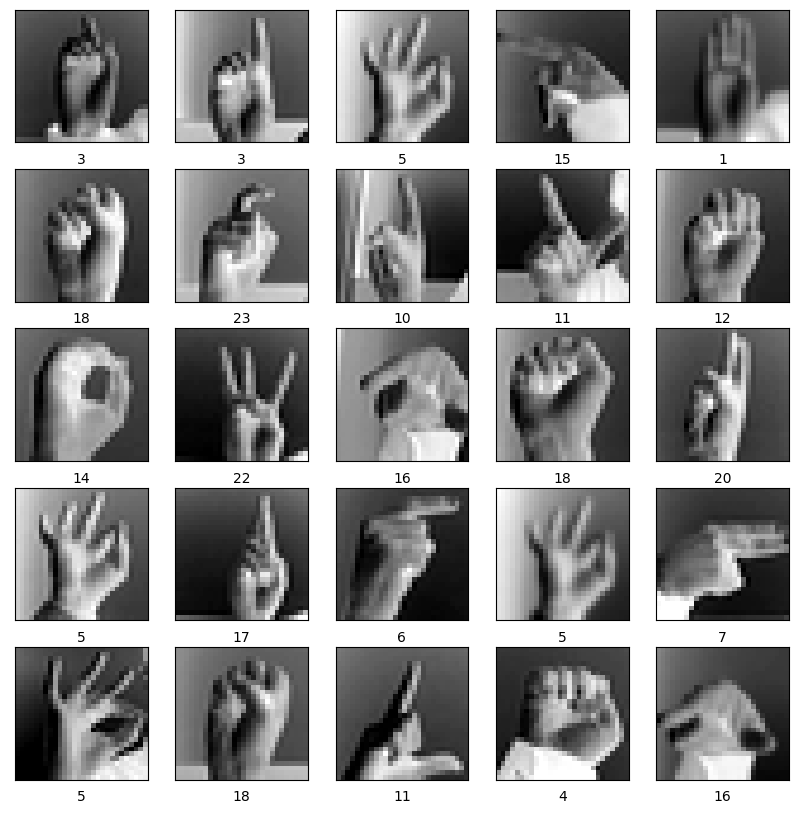

In [8]:
# Plotting the data to see the images and labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [9]:
# Building the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [10]:
# Compiling the CNN model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Training the CNN model
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
687/687 [==============================] - 28s 38ms/step - loss: 1.4996 - accuracy: 0.5303 - val_loss: 0.4889 - val_accuracy: 0.8368
Epoch 2/20
687/687 [==============================] - 23s 33ms/step - loss: 0.2681 - accuracy: 0.9157 - val_loss: 0.1531 - val_accuracy: 0.9519
Epoch 3/20
687/687 [==============================] - 23s 34ms/step - loss: 0.0762 - accuracy: 0.9804 - val_loss: 0.0292 - val_accuracy: 0.9975
Epoch 4/20
687/687 [==============================] - 22s 32ms/step - loss: 0.0222 - accuracy: 0.9962 - val_loss: 0.0122 - val_accuracy: 0.9987
Epoch 5/20
687/687 [==============================] - 25s 36ms/step - loss: 0.0348 - accuracy: 0.9902 - val_loss: 0.0169 - val_accuracy: 0.9976
Epoch 6/20
687/687 [==============================] - 23s 34ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 7/20
687/687 [==============================] - 24s 34ms/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.0160 - val_accuracy:

In [12]:
# Evaluating the CNN model with the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

225/225 [==============================] - 2s 10ms/step - loss: 0.5298 - accuracy: 0.8989
Test accuracy: 0.8989124298095703


In [13]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

225/225 [==============================] - 2s 9ms/step


In [14]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 415   0   0   0   0   0   0   0  17   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 299   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 230  15   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 280  21   0   0   0   0   0   0  11   9   0   0
   27   0   0   0   0   0]
 [  0   0   0   1   0   0  20 395   0   0   0   0   0   0   0   0   0   0
   20   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 278   0   0   0   0   0   0   0   0   0
    0   0   9   0   0   1]
 [  0   0   0   0   0   0   0   0   0 288   0   0   0   0   0   0  42   0
    0   0   0   1

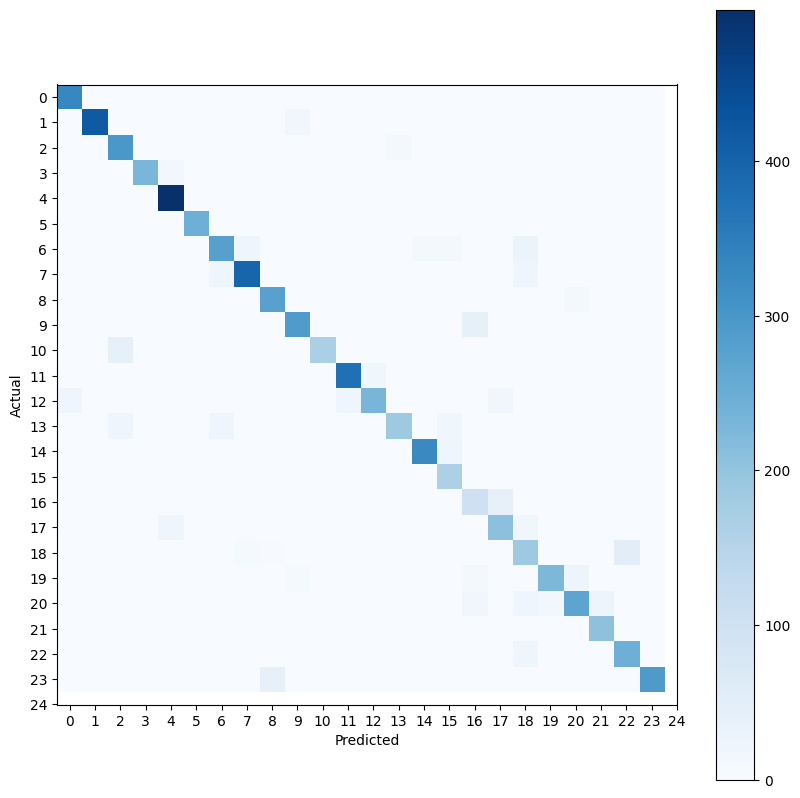

In [15]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(25))
plt.yticks(np.arange(25))
plt.colorbar()
plt.show()

In [16]:
# Saving the model
model.save('trainedModel/model.h5')


In [17]:
# Loading the model
model = keras.models.load_model('trainedModel/model.h5')

In [25]:
# Create a beautiful UI with Tkinter to predict the ,live sign language with the help of webcam using the model created above model
# Model is saved in : trainedModel/model.h5

In [28]:
# Importing Necessary Libraries for Creating the UI with Tkinter
import tkinter as tk
from tkinter import *
from PIL import Image, ImageTk
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [29]:
# Creating the UI
root = tk.Tk()
root.title("Sign Language Interpreter")
root.geometry("800x600")
root.configure(background='black')


In [30]:
# Creating the Canvas
canvas = tk.Canvas(root, width=600, height=500)
canvas.grid(columnspan=3, rowspan=3)

In [31]:
# Loading the saved model
model = keras.models.load_model('trainedModel/model.h5')

In [32]:
# Creating the labels
label = tk.Label(root, text="Sign Language Interpreter", font=('Helvetica', 20, 'bold'))
label.grid(columnspan=3, column=0, row=0)

In [33]:
# Creating the instructions
instructions = tk.Label(root, text="Press 'q' to quit", font=('Helvetica', 12))
instructions.grid(columnspan=3, column=0, row=1)

In [34]:
# Creating the labels for the letters
label1 = tk.Label(root, text="A", font=('Helvetica', 20, 'bold'))
label1.grid(column=0, row=2)
label2 = tk.Label(root, text="B", font=('Helvetica', 20, 'bold'))
label2.grid(column=1, row=2)
label3 = tk.Label(root, text="C", font=('Helvetica', 20, 'bold'))
label3.grid(column=2, row=2)
label4 = tk.Label(root, text="D", font=('Helvetica', 20, 'bold'))
label4.grid(column=0, row=3)
label5 = tk.Label(root, text="E", font=('Helvetica', 20, 'bold'))
label5.grid(column=1, row=3)
label6 = tk.Label(root, text="F", font=('Helvetica', 20, 'bold'))
label6.grid(column=2, row=3)
label7 = tk.Label(root, text="G", font=('Helvetica', 20, 'bold'))
label7.grid(column=0, row=4)
label8 = tk.Label(root, text="H", font=('Helvetica', 20, 'bold'))
label8.grid(column=1, row=4)
label9 = tk.Label(root, text="I", font=('Helvetica', 20, 'bold'))
label9.grid(column=2, row=4)
label10 = tk.Label(root, text="J", font=('Helvetica', 20, 'bold'))
label10.grid(column=0, row=5)
label11 = tk.Label(root, text="K", font=('Helvetica', 20, 'bold'))
label11.grid(column=1, row=5)
label12 = tk.Label(root, text="L", font=('Helvetica', 20, 'bold'))
label12.grid(column=2, row=5)
label13 = tk.Label(root, text="M", font=('Helvetica', 20, 'bold'))
label13.grid(column=0, row=6)
label14 = tk.Label(root, text="N", font=('Helvetica', 20, 'bold'))
label14.grid(column=1, row=6)
label15 = tk.Label(root, text="O", font=('Helvetica', 20, 'bold'))
label15.grid(column=2, row=6)
label16 = tk.Label(root, text="P", font=('Helvetica', 20, 'bold'))
label16.grid(column=0, row=7)
label17 = tk.Label(root, text="Q", font=('Helvetica', 20, 'bold'))
label17.grid(column=1, row=7)
label18 = tk.Label(root, text="R", font=('Helvetica', 20, 'bold'))
label18.grid(column=2, row=7)
label19 = tk.Label(root, text="S", font=('Helvetica', 20, 'bold'))
label19.grid(column=0, row=8)
label20 = tk.Label(root, text="T", font=('Helvetica', 20, 'bold'))
label20.grid(column=1, row=8)
label21 = tk.Label(root, text="U", font=('Helvetica', 20, 'bold'))
label21.grid(column=2, row=8)
label22 = tk.Label(root, text="V", font=('Helvetica', 20, 'bold'))
label22.grid(column=0, row=9)
label23 = tk.Label(root, text="W", font=('Helvetica', 20, 'bold'))
label23.grid(column=1, row=9)
label24 = tk.Label(root, text="X", font=('Helvetica', 20, 'bold'))
label24.grid(column=2, row=9)
label25 = tk.Label(root, text="Y", font=('Helvetica', 20, 'bold'))
label25.grid(column=0, row=10)
label26 = tk.Label(root, text="Z", font=('Helvetica', 20, 'bold'))
label26.grid(column=1, row=10)
label27 = tk.Label(root, text="Space", font=('Helvetica', 20, 'bold'))
label27.grid(column=2, row=10)

In [35]:
# Creating the labels for the probabilities
prob1 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob1.grid(column=0, row=11)
prob2 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob2.grid(column=1, row=11)
prob3 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob3.grid(column=2, row=11)
prob4 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob4.grid(column=0, row=12)
prob5 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob5.grid(column=1, row=12)
prob6 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob6.grid(column=2, row=12)
prob7 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob7.grid(column=0, row=13)
prob8 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob8.grid(column=1, row=13)
prob9 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob9.grid(column=2, row=13)
prob10 = tk.Label(root, text="0", font=('Helvetica', 20, 'bold'))
prob10.grid(column=0, row=14)

In [36]:
# Adding WebCam functionality to the GUI
lmain = tk.Label(root)
lmain.grid(column=0, row=0)

In [37]:
# Creating the button to start the program
button = tk.Button(root, text="Start", command=show_frame, font=('Helvetica', 20, 'bold'))
button.grid(column=0, row=15)

NameError: name 'show_frame' is not defined

In [38]:
# Creating the button to stop the program
button2 = tk.Button(root, text="Stop", command=stop, font=('Helvetica', 20, 'bold'))
button2.grid(column=1, row=15)

NameError: name 'stop' is not defined